In [1]:
print("radha")

radha


In [2]:
import pandas as pd;
import numpy as np;


K-means clustering is an algorithm that partitions a dataset into a specified number of clusters (\(k\)) by grouping similar data points based on their distance from cluster centroids. It works by iteratively assigning data points to the nearest centroid and then recalculating the centroids until the cluster assignments stabilize. This method is used for tasks like customer segmentation, image compression, and finding natural groupings in unlabeled data. 

<img src="https://media.geeksforgeeks.org/wp-content/uploads/20230904101155/Screenshot-2023-08-31-181724-(1).png">

The algorithm will categorize the items into "
k
k" groups or clusters of similarity. To calculate that similarity we will use the Euclidean distance as a measurement. The algorithm works as follows:  

Initialization: We begin by randomly selecting k cluster centroids.
Assignment Step: Each data point is assigned to the nearest centroid, forming clusters.
Update Step: After the assignment, we recalculate the centroid of each cluster by averaging the points within it.
Repeat: This process repeats until the centroids no longer change or the maximum number of iterations is reached.
The goal is to partition the dataset into 
k
k clusters such that data points within each cluster are more similar to each other than to those in other clusters.

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs

In [4]:
X,y = make_blobs(n_samples = 500,n_features = 2,centers = 3,random_state = 23)

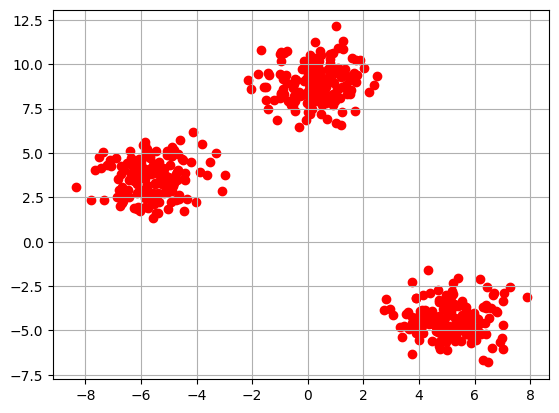

In [5]:
fig = plt.figure(0)
plt.grid(True)
plt.scatter(X[:,0],X[:,1],color='red')
plt.show()

In [6]:
np.random.seed(43)
k = 3;
clusters = {}

for i in range(k):
    center = 2*(2*np.random.random((X.shape[1],))-1)
    points = []
    cluster = {
        'center' : center,
        'points' : []
    }
    
    clusters[i] = cluster;

clusters

{0: {'center': array([-1.53978173,  0.43626616]), 'points': []},
 1: {'center': array([-1.46643614, -1.03764152]), 'points': []},
 2: {'center': array([-0.69144378,  1.43654996]), 'points': []}}

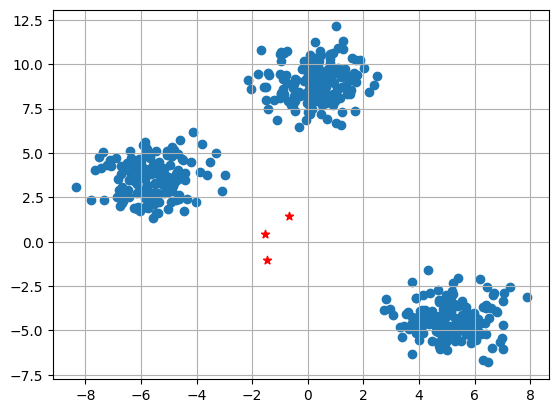

In [7]:
plt.scatter(X[:,0],X[:,1])
plt.grid(True)
for i in clusters:
    center = clusters[i]['center']
    plt.scatter(center[0],center[1],marker = '*',c = 'red')
plt.show()

In [8]:
def distance(p1,p2):
    return np.sqrt(np.sum((p1-p2)**2))

In [9]:
def assign_clusters(X, clusters):
    for idx in range(X.shape[0]):
        dist = []
        
        curr_x = X[idx]
        
        for i in range(k):
            dis = distance(curr_x,clusters[i]['center'])
            dist.append(dis)
        curr_cluster = np.argmin(dist)
        clusters[curr_cluster]['points'].append(curr_x)
    return clusters

def update_clusters(X, clusters):
    for i in range(k):
        points = np.array(clusters[i]['points'])
        if points.shape[0] > 0:
            new_center = points.mean(axis =0)
            clusters[i]['center'] = new_center
            
            clusters[i]['points'] = []
    return clusters

In [10]:
def pred_cluster(X, clusters):
    pred = []
    for i in range(X.shape[0]):
        dist = []
        for j in range(k):
            dist.append(distance(X[i],clusters[j]['center']))
        pred.append(np.argmin(dist))
    return pred

In [11]:
clusters = assign_clusters(X,clusters)
clusters = update_clusters(X,clusters)
pred = pred_cluster(X,clusters)

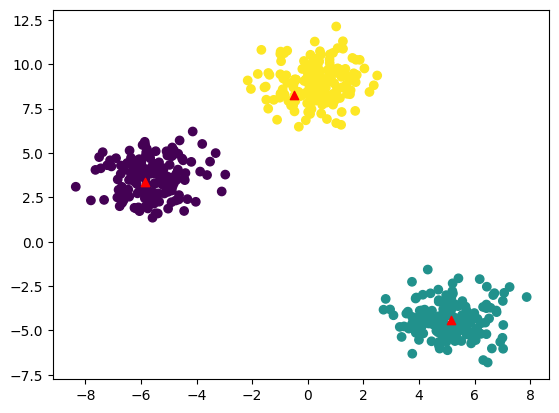

In [12]:
plt.scatter(X[:,0],X[:,1],c = pred)
for i in clusters:
    center = clusters[i]['center']
    plt.scatter(center[0],center[1],marker = '^',c = 'red')
plt.show()

k can be found by elbow method
sse = sse1 + sse2 + ...
plot sse its like elbow take corner point

In [14]:
from sklearn.cluster import KMeans
df = pd.read_csv("./incomeCluster.csv")
df.head()

,Name,Age,Income($)
0,Rob,27,70000
1,Michael,29,90000
2,Mohan,29,61000
3,Ismail,28,60000
4,Kory,42,150000


In [15]:
import matplotlib.pyplot as plt
%matplotlib inline

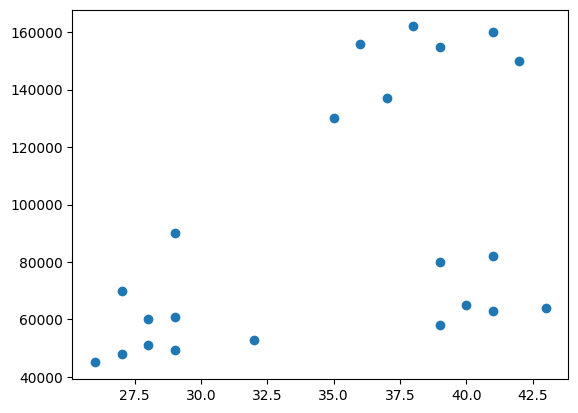

In [18]:
plt.scatter(df['Age'],df['Income($)'])

In [21]:
km = KMeans(n_clusters=3)
y_pred = km.fit_predict(df[['Age','Income($)']])
y_pred

array([2, 0, 2, 2, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 2],
      dtype=int32)

In [23]:
df['cluster'] = y_pred
df.head()

,Name,Age,Income($),cluster
0,Rob,27,70000,2
1,Michael,29,90000,0
2,Mohan,29,61000,2
3,Ismail,28,60000,2
4,Kory,42,150000,1


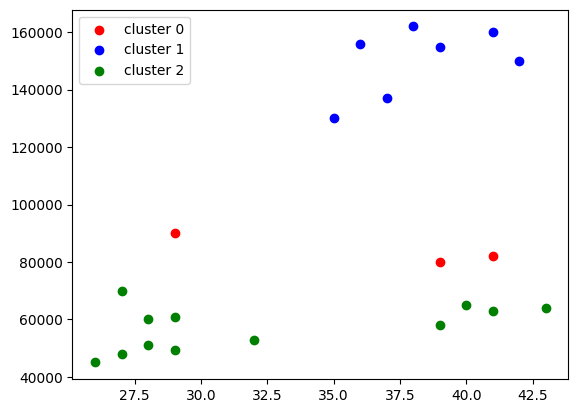

In [26]:
df0 = df[df.cluster==0]
df1 = df[df.cluster==1]
df2 = df[df.cluster==2]

plt.scatter(df0['Age'],df0['Income($)'],color='red',label='cluster 0')
plt.scatter(df1['Age'],df1['Income($)'],color='blue' ,label='cluster 1')
plt.scatter(df2['Age'],df2['Income($)'],color='green' ,label='cluster 2')

plt.legend()
plt.show()

In [31]:
# this happens due to the scale of age and income being different. so use minmax scaler Caesar cipher
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(df[['Income($)']])
df['Income($)'] = scaler.transform(df[['Income($)']])

scaler.fit(df[['Age']])
df['Age'] = scaler.transform(df[['Age']])
df.head()

,Name,Age,Income($),cluster,clusterAfterScaling
0,Rob,0.058824,0.213675,2,1
1,Michael,0.176471,0.384615,0,1
2,Mohan,0.176471,0.136752,2,1
3,Ismail,0.117647,0.128205,2,1
4,Kory,0.941176,0.897436,1,2


In [28]:
km = KMeans(n_clusters=3)
y_pred = km.fit_predict(df[['Age','Income($)']])
df['clusterAfterScaling'] = y_pred

In [29]:
df.head()

,Name,Age,Income($),cluster,clusterAfterScaling
0,Rob,0.058824,0.213675,2,1
1,Michael,0.176471,0.384615,0,1
2,Mohan,0.176471,0.136752,2,1
3,Ismail,0.117647,0.128205,2,1
4,Kory,0.941176,0.897436,1,2


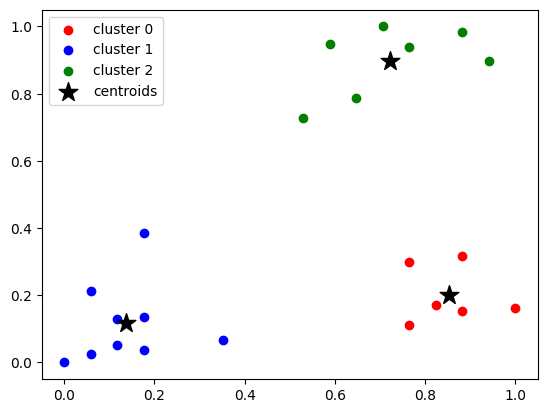

In [33]:
df1 = df[df.clusterAfterScaling==1]
df0 = df[df.clusterAfterScaling==0]
df2 = df[df.clusterAfterScaling==2]

plt.scatter(df0['Age'],df0['Income($)'],color='red',label='cluster 0')
plt.scatter(df1['Age'],df1['Income($)'],color='blue' ,label='cluster 1')
plt.scatter(df2['Age'],df2['Income($)'],color='green' ,label='cluster 2')

#plot centroids
centroids = km.cluster_centers_
plt.scatter(centroids[:,0],centroids[:,1],marker='*',s=200,color='black',label='centroids')

plt.legend()
plt.show()

In [34]:
km.cluster_centers_

array([[0.85294118, 0.2022792 ],
       [0.1372549 , 0.11633428],
       [0.72268908, 0.8974359 ]])

In [35]:
km.inertia_

0.4750783498553096

In [40]:
krng = range(1,10)
sse = []
for k in krng:
    km = KMeans(n_clusters=k)
    km.fit(df[['Age','Income($)']])
    sse.append(km.inertia_)

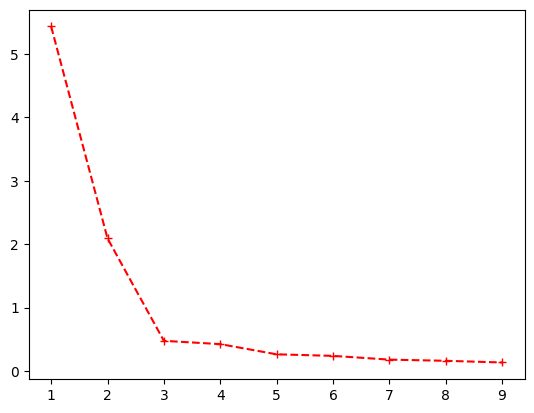

In [46]:
sse
plt.plot(krng,sse,'r+--')